# DSCP Final Project: Netflix Movies EDA

##### GitHub Link: 
- https://github.com/Delia2140/DSCP_Final_Project
- https://delia2140.github.io/DSCP_Final_Project/ (index.html)

## Student Profile

- **Name**: Hui-Chuan Lu (Delia Lu), 盧慧娟
- **Student ID**: 40921142L
- **Department**: Department of English
- **Email**: gpdus010421@gmail.com

## Preface

Hello, I am Delia Lu from the Department of English. This course was my first introduction to data science and computer programming. Throughout the semester, I learned how to work with tabular data and apply basic data analysis and visualization techniques using Python.

At the beginning of the course, I found programming challenging and sometimes frustrating. However, through hands-on practice with datasets in Homework 1 and 2, I gradually came to see coding as a practical tool for analysis rather than just a technical requirement.

## Motivation

As a student majoring in English, I often engage with media platforms such as YouTube and Netflix as part of my language learning process, rather than relying solely on traditional textbooks. While Netflix has been a useful resource for improving my English listening skills, I have also noticed an increasing presence and popularity of non-English content on the platform.  

As a Korean international student, I have been particularly aware of the rapid global rise of Korean movies and TV shows in recent years. This trend made me curious about how non-English content, especially from countries outside English-speaking regions, is represented on Netflix.

Therefore, this observation motivated me to explore Netflix not only as a language learning tool, but also as a global media platform. By examining the distribution and growth of English and non-English movies, this analysis aims to better understand Netflix's shifting content strategy in response to global audiences.

## Dataset

The dataset used in this project was obtained from Kaggle. (https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows)

It contains metadata on movies and TV shows available on Netflix. Key variables include content type, country of production, and release year. These variables are used to analyze trends in English and non-English movies over time.

## Objectives

### Objective 1: Examine the overall distribution of content types on Netflix.  
Specifically, it compares how many titles are <b>Movies</b> versus <b>TV Shows</b> in the dataset.

- #### Pseudocode:
  1. Load <font face = "monospace" style="color:black; background-color: gainsboro">netflix_titles.csv</font> into a DataFrame.  
  2. Select the <font face = "monospace" style="color:black; background-color: gainsboro">type</font> column to identify content categories.  
  3. Count the number of titles for each <font face = "monospace" style="color:black; background-color: gainsboro">type</font> (Movie vs TV Show).
  4. Calculate the percentage share of each type (optional).  
  5. Visualize the distribution using a bar chart:
     - x-axis: content type (Movie, TV Show)
     - y-axis: number of titles

- #### Algorithm:
  - First, the dataset is loaded and the <font face = "monospace" style="color:black; background-color: gainsboro">type</font> column is used to categorize each title as either a **Movie** or a **TV Show**. The number of titles in each category is counted, and percentages are optionally computed to summarize the overall composition.
  - Next, the results are visualized with a **bar chart** to clearly show which content type is more common in the dataset.


Percent by type(%):
type
Movie      69.6
TV Show    30.4
Name: count, dtype: float64


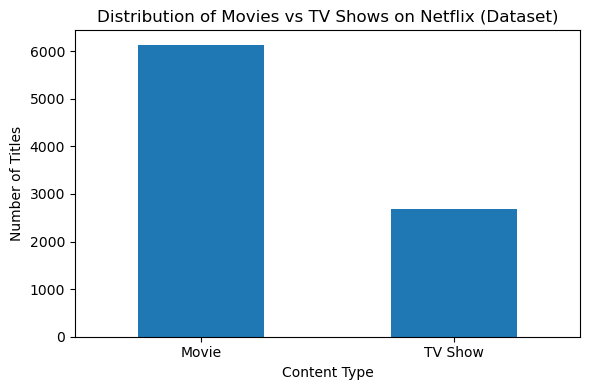

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("netflix_titles.csv")

# 2) Count titles by type
type_counts = df["type"].value_counts()
type_percent = (type_counts / len(df) * 100).round(1)

# 3) Calculate the percentage
print("\nPercent by type(%):")
print(type_percent)

# 4) Visualization: bar chart
plt.figure(figsize=(6,4))
type_counts.plot(kind="bar")
plt.title("Distribution of Movies vs TV Shows on Netflix (Dataset)")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In this dataset of 8,807 titles, movies account for approximately 70% of the catalog, while TV shows make up about 30%. This indicates that Netflix's content in this dataset is more heavily composed of movies than TV series.  

This distribution supports the focus of subsequent analyses (Objectives 2 and 3) on movies, as they represent the majority of titles in the dataset. In addition, movies have a clearly defined release year, making them more suitable for time-based trend analysis.

### Objective 2: Examine the distribution of English and non-English movies on Netflix. 

- #### Pseudocode:
  1. Load <font face = "monospace" style="color:black; background-color: gainsboro">netflix_titles.csv</font> into a DataFrame.
  2. Keep only rows where <font face = "monospace" style="color:black; background-color: gainsboro">type</font> is <font face = "monospace" style="color:black; background-color: gainsboro">"Movie"</font>.
  3. Remove rows with missing <font face = "monospace" style="color:black; background-color: gainsboro">release_year</font> and <font face = "monospace" style="color:black; background-color: gainsboro">country</font> values.
  4. Create a new column <font face = "monospace" style="color:black; background-color: gainsboro">language_group</font>:
     - If <font face = "monospace" style="color:black; background-color: gainsboro">country</font> contains <font face = "monospace" style="color:black; background-color: gainsboro">"United States"</font> or <font face = "monospace" style="color:black; background-color: gainsboro">"United Kingdom"</font> → <font face = "monospace" style="color:black; background-color: gainsboro">"English"</font>.
     - Else → <font face = "monospace" style="color:black; background-color: gainsboro">"Non-English"</font>.
     - If multiple countries are listed, classify the movie as English only when the US or the UK is included.
  5. Count the number of movies in each <font face = "monospace" style="color:black; background-color: gainsboro">language_group</font>.
  6. Convert the counts into percentages.
  7. Visualize the distribution using a pie chart:
     - slices: English vs Non-English
     - labels: group names
     - display percentages on the chart

- #### Algorithm:
  - The dataset is filtered to include only movies and entries with valid country information. Movies are classified into English and non-English groups based on whether the country field includes the US or the UK.
  - Next, the number of movies in each group is counted and converted into percentages. A pie chart is then used to visualize the overall distribution of English and non-English movies in the Netflix catalog.

Distribution of English vs Non-English Movies (%):
language_group
English        53.5
Non-English    46.5
Name: count, dtype: float64


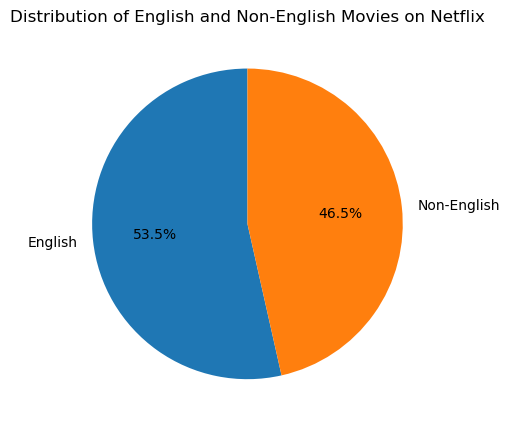

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("netflix_titles.csv")

# 2) Keep only movies
movies = df[df["type"] == "Movie"].copy()

# 3) Remove missing values
movies = movies.dropna(subset=["release_year", "country"])

# 4) Classify language group
movies["language_group"] = movies["country"].apply(
    lambda x: "English" if ("United States" in x or "United Kingdom" in x) else "Non-English"
)

# 5) Count movies by language group
language_counts = movies["language_group"].value_counts()
language_percent = (language_counts / language_counts.sum() * 100).round(1)

# 6) Calculate the percentage
print("Distribution of English vs Non-English Movies (%):")
print(language_percent)

# 7) Visualization
plt.figure(figsize=(5,5))
plt.pie(
    language_counts.values,
    labels=language_counts.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Distribution of English and Non-English Movies on Netflix")
plt.tight_layout()
plt.show()

The pie chart shows that English-language movies account for 53.5% of Netflix’s movie catalog, while non-English movies make up 46.5%, resulting in a near-even distribution. This result supports the idea that Netflix functions as a global media platform. It also aligns with the recent rise in popularity of non-English content, which may contribute to the platform’s increasingly international orientation.

#### Objective 3: Compare the growth of English and non-English movies on Netflix over time.

- #### Pseudocode:
  1. Use the same data cleaning and language classification steps as in Objective 2.
  2. Group the data by <font face = "monospace" style="color:black; background-color: gainsboro">release_year</font> and <font face = "monospace" style="color:black; background-color: gainsboro">language_group</font>.
  3. Count the number of movies released each year for each language group.
  4. Separate the counts into two series → English vs Non-English. 
  5. Plot a line chart with two lines to compare growth over time:
     - x-axis: <font face = "monospace" style="color:black; background-color: gainsboro">release_year</font>
     - y-axis: number of movies

- #### Algorithm:
  - The cleaned movie dataset from Objective 2 is reused and grouped by release year and language group. The number of English and non-English movies released each year is counted and visualized using a two-line chart, allowing for a direct comparison of their growth trends over time.

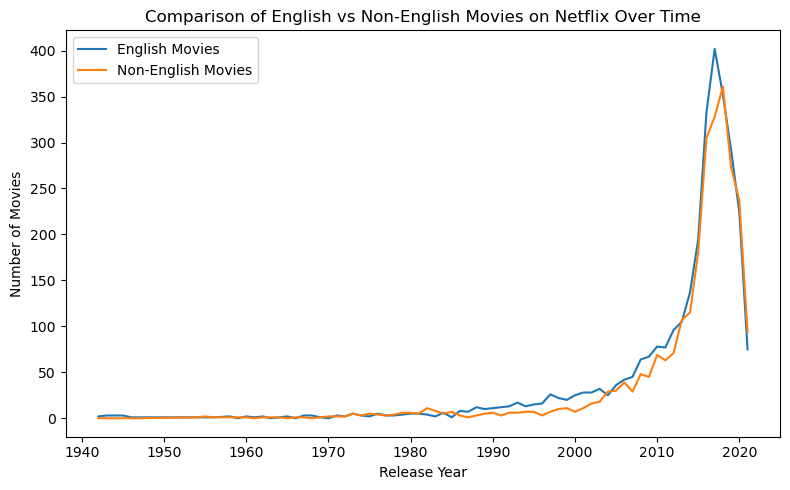

In [16]:
# 1) Reuse the cleaned movie dataset from Objective 2
import pandas as pd
import matplotlib.pyplot as plt

    # Load dataset
df = pd.read_csv("netflix_titles.csv")

    # Keep only movies
movies = df[df["type"] == "Movie"].copy()

    # Remove missing values
movies = movies.dropna(subset=["release_year", "country"])

    # Classify language group
movies["language_group"] = movies["country"].apply(
    lambda x: "English" if ("United States" in x or "United Kingdom" in x) else "Non-English"
)

# 2) Group the data by release year and language group
# 3) Count the number of movies released each year for each language group
yearly_counts = (
    movies.groupby(["release_year", "language_group"])
    .size()
    .unstack(fill_value=0)
)

# Split into two Series
english_counts = yearly_counts["English"]
non_english_counts = yearly_counts["Non-English"]

# 5) Plot a line chart with two lines
plt.figure(figsize=(8, 5))
plt.plot(english_counts.index, english_counts.values, label="English Movies")
plt.plot(non_english_counts.index, non_english_counts.values, label="Non-English Movies")
plt.title("Comparison of English vs Non-English Movies on Netflix Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.legend()
plt.tight_layout()
plt.show()

The comparison shows that English-language movies consistently account for a larger number of releases than non-English movies over time. However, both groups exhibit strong growth after the mid-2000s, especially during the 2010s, with non-English movies showing a rapid increase in recent years.  

While English movies remain dominant in absolute numbers, the narrowing gap between the two groups suggests that non-English movies are growing at a comparable rate. This trend reflects Netflix’s increasing investment in global content and aligns with the rising international popularity of non-English movies. The decline observed in the most recent year likely reflects incomplete data rather than an actual decrease in movie releases.

## Reflection

Through this project, I was able to use data analysis and visualization to look at Netflix in a new way. As a student majoring in English, I had previously viewed Netflix mainly as a tool for language learning, but this analysis helped me recognize it as a global media platform shaped by diverse cultural trends. This project also made me feel more confident using Python for EDA and showed me how data can meaningfully support my personal observations and academic interests.